<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 4</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jose Eduardo Garnica Aza - Johan Sebastian Suarez Sepulveda</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jgarnicaa@unal.edu.co email: jssuarezse@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="Integrantes.png",width=10,height=10>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>10 de abril de 2022</p>

In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 
import math as m
import time
import timeit as tm
import cv2 as cv
import pandas as pd

In [2]:
image=cv.imread('Tarjeton.jpg')

# Segmentación por similitud: División y mezcla de regiones
## División:
- Inicio : Toda la imagen se supone homogénea.
- Comprobación : Si la suposicion es falsa se realiza una primera division
- Repetición : Se repite suposición y chequeo para subimágenes.
- Finalizacion: Se repite hasta que cada región es homogénea.

## Mezcla:
- Problema de la división de regiones: Se crean regiones adyacentes similares.
- Solución : Inclusión de un algoritmo de unión o mezcla.
- Procedimiento : Mezcla de las regiones generadas por la división.
- Resultado : Se obtienen menos regiones.
- La mezcla puede hacerse : Antes de cada división, o al final del proceso completo de división de regiones.


- Se define código para revisar las divisiones que se vayan ejecutando dentro de esta función

In [3]:
# split 
#Codigo para division-mezcla

def Division_Judge(img, h0, w0, h, w) :
    area = img[h0 : h0 + h, w0 : w0 + w]
    mean = np.mean(area)
    std = np.std(area, ddof = 1)

    total_points = 0
    operated_points = 0

    for row in range(area.shape[0]) :
        for col in range(area.shape[1]) :
            if (area[row][col] - mean) < 2 * std :
                operated_points += 1
            total_points += 1

    if operated_points / total_points >= 0.95 :
        return True
    else :
        return False


- Se define el codigo que mezclará las regiones encontradas en una función individual

In [4]:
#Mezcla
def Merge(img, h0, w0, h, w) :
    # area = img[h0 : h0 + h, w0 : w0 + w]
    # _, thresh = cv.threshold(area, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)
    # img[h0 : h0 + h, w0 : w0 + w] = thresh
    for row in range(h0, h0 + h) :
        for col in range(w0, w0 + w) :
            if img[row, col] > 100 and img[row, col] < 200:
                img[row, col] = 0
            else :
                img[row, col] = 255


- Se toma una función de recursión para ir diviendo consecutivamente la imagen de estudio

In [5]:
#Recursion
def Recursion(img, h0, w0, h, w) :
    # If the splitting conditions are met, continue to split 
    if not Division_Judge(img, h0, w0, h, w) and min(h, w) > 5 :
        # Recursion continues to determine whether it can continue to split 
        # Top left square 
        Division_Judge(img, h0, w0, int(h0 / 2), int(w0 / 2))
        # Upper right square 
        Division_Judge(img, h0, w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
        # Lower left square 
        Division_Judge(img, h0 + int(h0 / 2), w0, int(h0 / 2), int(w0 / 2))
        # Lower right square 
        Division_Judge(img, h0 + int(h0 / 2), w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
    else :
        # Merge 
        Merge(img, h0, w0, h, w)


- Definición para la ejecución de las funciones definidas anteriormente

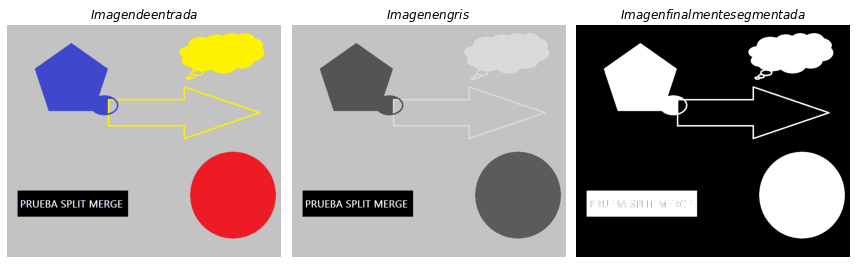

In [6]:

def Division_Merge_Segmented() :
    img = cv.imread('SplitMerge.png') #Se usa una imagen en la que sea fácil verificar todas las zonas
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    hist, bins = np.histogram(img_gray, bins = 256)
    

    segemented_img = img_gray.copy()
    Recursion(segemented_img, 0, 0, segemented_img.shape[0], segemented_img.shape[1])

    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$Imagen de entrada$')
    plt.subplot(132), plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255)
    plt.axis('off'), plt.title(f'$Imagen en gris$')
    plt.subplot(133), plt.imshow(segemented_img, cmap='gray')
    plt.axis('off'), plt.title(f'$Imagen finalmente segmentada$')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    Division_Merge_Segmented()


# Contornos

- Un contorno se puede definir como una secuencia de puntos.
- Todo contorno delimita dos zonas, una acotada (el contorno y su interior) y otra infinita (el fondo), creándose un sub-mundo gráfico particular en cada forma definida por cada contorno.
- A continuacion mostraremos algunas implementaciones para encontrar contornos

In [7]:
## imagen umbralizada
imagegray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(imagegray,127,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (0,255,0), 3)
cv.imshow('contornos', image)
cv.waitKey(0)
cv.destroyAllWindows()

- En la figura anterior, podemos ver los bordes de una imagen perteneciente al proyecto academico debido a que no es muy clara se usará otro ejemplo para mostrarlos más visibles.

In [8]:
image2=cv.imread('cannytarjeton.jpg')
imagegray2 = cv.cvtColor(image2, cv.COLOR_RGB2GRAY)
ret2, thresh2 = cv.threshold(imagegray2,127,255,0)
contours2, hierarchy2 = cv.findContours(thresh2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(image2, contours2, -1, (0,255,0), 3)
cv.imshow('contornos', image2)
cv.waitKey(0)
cv.destroyAllWindows()

# Transformada de Hough.
- Es un algoritmo que permite encontrar ciertas formas dentro de una imagen, como líneas, círculos, etc.
- Su modo de operación es principalmente estadístico y consiste en que para cada punto que se desea averiguar si es parte de una línea se aplica una operación dentro de cierto rango, con lo que se averiguan las posibles líneas de las que puede ser parte el punto.
- Esto se continúa para todos los puntos en la imagen, al final se determina qué líneas fueron las que más puntos posibles tuvieron y esas son las líneas en la imagen.

# Líneas 1

In [9]:
image=cv.imread('Tarjeton.jpg')
imagegray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
edges = cv.Canny(imagegray, 50, 150, apertureSize=3)
cv.imshow('edges', edges)
lines = cv.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv.imshow('image', image)
k = cv.waitKey(0)
cv.destroyAllWindows()

- Las letras del fondo de la imagen, como la curvatura de los cuadros de los números, hacen que este método no sea muy eficiente, vamos a probarlo con otra imagen.

In [10]:
image=cv.imread('sodoku.png')
imagegray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
edges = cv.Canny(imagegray, 50, 150, apertureSize=3)
cv.imshow('edges', edges)
lines = cv.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv.imshow('image', image)
k = cv.waitKey(0)
cv.destroyAllWindows()

- Se pueden observar por completo las lineas del sodoku.

# Líneas 2

In [14]:
img = cv.imread('tarjeton.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
cv.imshow('edges', edges)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv.imshow('image', img)
k = cv.waitKey(0)
cv.destroyAllWindows()

- si bien los contornos mejoran, las letras de fondo distorsionan el resultado de la operacion, aún no se tiene la imagen sin el mensaje, por lo cual utilizaremos de nuevo la imagen del sodoku.

In [12]:
img = cv.imread('sodoku.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
cv.imshow('edges', edges)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv.imshow('image', img)
k = cv.waitKey(0)
cv.destroyAllWindows()

- Al ser un método probabilístico, algunas líneas no se alcanzan a ver con detalle.

# Circulos

- Cómo el tarjeton no tiene muchos circulos, se usará un ejemplo más acertado

In [ ]:
olimpicos= cv.imread('olimpicos.jpg')
gray_img=cv.cvtColor(olimpicos,cv.COLOR_BGR2GRAY)
img= cv.medianBlur(gray_img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
 
#center
 
circles= cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,120,param1=100,param2=30,minRadius=0,maxRadius=0)
circles= np.uint16(np.around(circles))
 
for i in circles[0,:]:
 #drawtheoutercircle
 cv.circle(olimpicos,(i[0],i[1]),i[2],(0,255,0),6)
 # draw the center of the circle
 cv.circle(olimpicos,(i[0],i[1]),2,(0,0,255),3)
 
cv.imshow("HoughCirlces",olimpicos)
cv.waitKey()
cv.destroyAllWindows()

# Crecimiento de regiones

- Para mostrar el funcionamiento de esta funcion, utilizaremos la imagen de los juegos olimpicos la cual se podra rellenar al dar click.
- Para salir presione la tecla escape.

In [ ]:
def mouse_clic(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONUP:
        src = param.copy()

        cv.floodFill(src, None, (x, y), (0, 255, 255))
        cv.imshow('Fill zone', src)

def main():
    winname = 'Flood fill'
    img = cv.imread('olimpicos.jpg')

    cv.namedWindow(winname)
    cv.setMouseCallback(winname, mouse_clic, img)

    while(1):
        cv.imshow(winname, img)
        if cv.waitKey(20) & 0xFF == 27:
            break

    cv.destroyAllWindows()
    
if __name__ == '__main__':
    main()

# Wastershed
- Esta operación considera la magnitud del gradiente de una imagen como una superficie topográfica.
- Los píxeles que tienen las más altas intensidades de gradiente corresponden a las líneas divisorias, que representan los límites de las regiones.
- Los píxeles que drenan a un mínimo común forman una cuenca, que representa un segmento de la imagen (un objeto).
- Para ver su implementacion nos guiaremos del ejemplo proporcionado por la documentación de la libreria de opencv.

In [ ]:
img = cv.imread('coins.jpg')
cv.imshow("soriginal ",img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv.imshow("umbralizada",thresh)
cv.imshow("regiones segmentadas",sure_fg)
cv.imshow("salida ",img)


cv.waitKey()
cv.destroyAllWindows()

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Análisis y conclusiones </p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Taller 4</p1>


* Se nota que cada método tiene un objetivo común pero en el cual el enfoque es diferente, lo cual puede ayudar bastante para encontrar el mejor método dependiendo de la aplicación que se requiere, por ejemplo en el proyecto propuesto del tarjeton de elecciones no fue optima la transformada de hough debido a que no se generaban correctamente las líneas que se buscaban cómo pasaba al momento de usar un sudoku o un crucigrama por ejemplo.
* Cómo el objetivo principal de todos los métodos es encontrar las figuras que se deseen es recomendable su uso para hacer diferentes distinciones entre formas dentro de una imagen, por ejemplo, de una imagen la cual se quieran sustraer solamente circulos se puede usar la transformada de Hough enfocada a circulos, así mismo, para hallar figuras que sean distintas al fondo y diferenciarlas se puede usar el método de Split-Merge o también la operación Wastershed que permite encontrar las diferentes figuras dentro de una misma imagen, por ello es importante definir correctamente el objetivo de uso.
* En cuanto al consumo de recursos, se recomienda usar las operaciones que estén incluidas directamente en la libreria de opencv debido a que estas están correctamente optimizadas, por ejemplo para hallar los contornos mediante cv.findContours por otro lado el uso de los otros métodos generará mayor estrés en la cpu por tanto es un factor obligatorio a tener en cuenta dependiendo nuevamente de la aplicación deseada.
